In [1]:
import pandas as pd
import os
import re
import string

In [2]:
# Get all the books into a dataframe

directory = 'books'
text = []
part = []
for filename in os.listdir(directory):
    f = open("books/"+ filename,"r",encoding="utf8")
    lines = f.readlines()
    bookname = filename.split('.')[0][1:]
    part.append(bookname)
    actext = ' '.join(lines)
    text.append(actext)

In [3]:
data = pd.DataFrame({'part':part,'script': text},index = part)
test = data.copy()
tester = data.copy()

In [4]:
# Apply a first round of text cleaning techniques
change = {'chapter one':"",'chapter two':'','chapter three':'','chapter four':'','chapter five':'','chapter six':'','chapter seven':'','chapter eight':''
           ,'chapter nine':'','chapter ten':'','chapter eleven':'','chapter twelve':'','chapter thirteen':'','chapter fourteen':'','chapter fifteen':''
           ,'chapter sixteen':'','chapter seventeen':'','chapter eighteen':'','chapter nineteen':'','chapter twenty':'','chapter twenty-one':'','chapter twenty-two':''
           ,'chapter twenty-three':'','chapter twenty-four':'','chapter twenty-five':'','chapter twenty-six':'','chapter twenty-seven':'','chapter twenty-eight':''
           ,'chapter twenty-nine':'','chapter thirty':'','chapter thirty-one':'','chapter thirty-two':'','chapter thirty-three':'','chapter thirty-four':''
           ,'chapter thirty-five':'','chapter thirty-six':'','chapter thirty-seven':'','chapter thirty-eight':''}

def replace_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text

def cleantext(text):
    text = text.lower()
    text = re.sub('[“..."\xad\n\t().,:;()!?]', '', text) #removing various symbols mentioned inside the square brackets
    text = re.sub("[']", '', text)
    text = text.replace("--",'') #replacing symbol with none
    #text = re.sub('[%s]' % re.escape(string.punctuation), '', text) #to clean of punctuation marks
    text = re.sub('chapter \d+ ', '', text) #to remove chapter names that have numbers in them eg:chapter 1, chapter 2 etc.
    text = replace_all(text, change)
    return text

basic = lambda x: cleantext(x)

In [5]:
test = pd.DataFrame(test.script.apply(basic))
tester = pd.DataFrame(tester.script.apply(basic))

1. Clearly We ought to clean quite a lot, starting with "CHAPTER" and then the special characters such as "\n, \, ..., --, !, ",',\xad ". I hope hoewver not to delete the '-' as it the words like 'You-know-who' are considered as one word and will lose its meaning if done so. 
2. Will have to convert all the words to lower case.
3. Bound to remove ONE, TWO... adjoining the CHAPTER as well. 
4. Can't use the means to remove non-english words as a good percent of the harry potter terminology is made up and it puts us at a disadvantage. 

After cleaning let's see first the different characters in all the books. 

In [6]:
import collections 
from collections import Counter 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [7]:
relist = ['t','y','ll','d','o','s','m'] # remove list == relist 

adlist = ['hadnt','wasnt','dont','its','lets','youd','shes','werent','youll','doesnt','isnt','wont','youre','neednt',
          'didnt','youve','hasnt','wouldnt','shouldnt','couldnt','mightnt','aint','arent','hes','yours','his','im','thats',
         'theyre','id','theres','ill','say', 'could', 'look', 'like', 'see','seen','looked','said','says'] #add list == adlist

for i in relist:
    stop_words.remove(i)  #removing some existing stop words from the set

for j in adlist:
    stop_words.add(j) #adding some custom stop words to the set

In [8]:
print(stop_words)

{'youve', 'hasn', 'shan', 'been', 'no', 'that', 'on', 'all', 'neednt', 'theyre', "needn't", 'hadnt', 'to', 'herself', 'ill', "you're", 'youll', 'each', 'ourselves', 'shes', "hadn't", 'hasnt', 'arent', 'had', 'having', 'few', 'out', 'here', 'are', "you'll", 'you', 'won', 'about', 'can', 'could', 'theres', 'again', "you'd", 'those', 'isn', 'their', 'lets', 'id', 'his', 'was', 'there', 'thats', 'said', 'we', 'mightn', 'my', 'yourselves', 'so', 'most', 'between', 'the', "didn't", 'isnt', 'shouldnt', 'myself', 'she', 'didn', 'seen', 'hers', 're', 'not', 'they', 'into', 'says', 'very', 'he', 'up', 'off', 'im', 'didnt', 'wont', 'your', 'above', 'where', 'being', 'do', "wouldn't", 'don', 'too', 'an', 'other', 'wasn', "shan't", 'him', 'what', "aren't", 'as', 'youd', 'which', 'own', 'down', "couldn't", "isn't", 'for', 'see', "it's", 'but', 'himself', "you've", 'itself', "don't", 'this', 'wasnt', 'wouldnt', 'werent', 'hes', 'when', "doesn't", 'our', 'these', 'youre', "weren't", "won't", 'and', 't

In [9]:
# Cleaning the test dataset some more by removing stop words. 
for i in test.index:
    tokens = word_tokenize(test.loc[i][0])
    words = [w for w in tokens if not w in stop_words]
    test.loc[i][0] = ' '.join(words)

for i in tester.index:
    tokens = word_tokenize(tester.loc[i][0])
    words = [w for w in tokens if not w in stop_words]
    tester.loc[i][0] = ' '.join(words)

In [10]:
#Lemmatization of one dataset which is a copy of original data, we shall compare lemmatized and non lemmatized datasets' results. 
for i in tester.index:
    tokens = word_tokenize(tester.loc[i][0])
    tojoin = []
    for wor in tokens:
        tojoin.append(wordnet_lemmatizer.lemmatize(wor,pos = "v"))
    tester.loc[i][0] = ' '.join(tojoin)

In [11]:
corpus_test = word_tokenize(test.loc['SorcerersStone'][0]) 
# Analysing with one script - Harry potter and the sorcerers stone to understand the process and make sense of the data 
corpus_tester = word_tokenize(tester.loc['SorcerersStone'][0])

In [12]:
print(nltk.FreqDist(corpus_test).most_common(50))

[('harry', 1212), ('ron', 410), ('hagrid', 336), ('back', 261), ('hermione', 257), ('one', 254), ('got', 206), ('get', 194), ('know', 188), ('professor', 180), ('snape', 145), ('around', 142), ('dumbledore', 142), ('hed', 138), ('going', 135), ('well', 135), ('go', 134), ('something', 129), ('never', 126), ('right', 125), ('think', 123), ('uncle', 121), ('time', 119), ('dudley', 116), ('harrys', 113), ('first', 111), ('malfoy', 109), ('would', 108), ('even', 105), ('eyes', 105), ('door', 105), ('vernon', 105), ('neville', 102), ('yeh', 100), ('head', 99), ('two', 99), ('looking', 98), ('thought', 96), ('next', 96), ('come', 95), ('mcgonagall', 95), ('potter', 94), ('way', 94), ('told', 93), ('people', 92), ('still', 92), ('room', 90), ('quirrell', 90), ('face', 87), ('though', 86)]


In [13]:
print(nltk.FreqDist(corpus_tester).most_common(50))

[('harry', 1325), ('get', 461), ('ron', 410), ('go', 401), ('hagrid', 336), ('know', 294), ('back', 267), ('hermione', 257), ('one', 254), ('think', 242), ('come', 204), ('tell', 180), ('professor', 180), ('take', 174), ('try', 170), ('snape', 145), ('around', 142), ('dumbledore', 142), ('make', 141), ('hed', 138), ('time', 137), ('want', 135), ('well', 135), ('find', 134), ('something', 129), ('never', 126), ('leave', 125), ('right', 125), ('head', 122), ('uncle', 121), ('even', 120), ('eye', 120), ('dudley', 116), ('turn', 115), ('potter', 112), ('first', 111), ('hand', 111), ('face', 109), ('malfoy', 109), ('would', 108), ('hear', 108), ('keep', 106), ('look', 106), ('door', 105), ('vernon', 105), ('give', 102), ('neville', 102), ('ask', 101), ('yeh', 100), ('two', 99)]


Checking the lemmatized and non-lemmatized data, non-lemmatized looks literary wise better and makes more sense when compared to the lemmatized version. Hence we shall exclude the lemmatized format from the below frequent words/sentences analysis. 

###### From bigrams to sixgrams

Finding the most frequent set of words to understand the gist of the text. 

In [14]:
n_most_common= 5 #I chose to take top 5 combination of words. 

In [17]:
#For test dataset - Without lemmatization 

ungrams = list(nltk.ngrams(corpus_test,1))
bigrams = list(nltk.ngrams(corpus_test,2))
trigrams = list(nltk.ngrams(corpus_test,3))
fourgrams = list(nltk.ngrams(corpus_test,4))
fivegrams = list(nltk.ngrams(corpus_test,5))
sixgrams = list(nltk.ngrams(corpus_test,6))

nungrams = nltk.FreqDist(ungrams).most_common(n_most_common) #n most common ungrams
nbigrams = nltk.FreqDist(bigrams).most_common(n_most_common) #n most common bigrams
ntrigrams = nltk.FreqDist(trigrams).most_common(n_most_common) #n most common trigrams
nfourgrams = nltk.FreqDist(fourgrams).most_common(n_most_common) #n most common four grams
nfivegrams = nltk.FreqDist(fivegrams).most_common(n_most_common) #n most common five grams
nsixgrams = nltk.FreqDist(sixgrams).most_common(n_most_common) #n most common six grams

#concatinating the words together 
ungrams=[x[0][0] for x in nungrams]
bigrams=[x[0][0]+' '+x[0][1] for x in nbigrams]
trigrams=[x[0][0]+' '+x[0][1]+' '+x[0][2] for x in ntrigrams]
fourgrams=[x[0][0]+' '+x[0][1]+' '+x[0][2]+' '+x[0][3] for x in nfourgrams]
fivegrams=[x[0][0]+' '+x[0][1]+' '+x[0][2]+' '+x[0][3]+' '+x[0][4]  for x in nfivegrams]
sixgrams=[x[0][0]+' '+x[0][1]+' '+x[0][2]+' '+x[0][3]+' '+x[0][4]+' '+x[0][5]  for x in nsixgrams]

#extending the list to give us the top used words and combination of words. 
n_grams=ungrams
n_grams.extend(bigrams)
n_grams.extend(trigrams)
n_grams.extend(fourgrams)
n_grams.extend(fivegrams)
n_grams.extend(sixgrams)

In [18]:
print(n_grams) #non-lemmatized

['harry', 'ron', 'hagrid', 'back', 'hermione', 'uncle vernon', 'professor mcgonagall', 'aunt petunia', 'harry ron', 'ron hermione', 'nimbus two thousand', 'harry ron hermione', 'platform nine three-quarters', 'gryffindor common room', 'get past fluffy', 'vault seven hundred thirteen', 'botts every flavor beans', 'uncle vernon aunt petunia', 'hogwarts school witchcraft wizardry', 'one thousand magical herbs', 'one thousand magical herbs fungi', 'bettie botts every flavor beans', 'read hogwarts school witchcraft wizardry', 'died codswallop opinion dunno enough', 'codswallop opinion dunno enough human', 'died codswallop opinion dunno enough human', 'codswallop opinion dunno enough human left', 'opinion dunno enough human left die', 'dumbledore particularly famous defeat dark wizard', 'particularly famous defeat dark wizard grindelwald']


In [19]:
un=[(x[0][0],x[1]) for x in nungrams]
bi=[(x[0][0]+' '+x[0][1],x[1]) for x in nbigrams]
tri=[(x[0][0]+' '+x[0][1]+' '+x[0][2],x[1]) for x in ntrigrams]
four=[(x[0][0]+' '+x[0][1]+' '+x[0][2]+' '+x[0][3],x[1]) for x in nfourgrams]
five=[(x[0][0]+' '+x[0][1]+' '+x[0][2]+' '+x[0][3]+' '+x[0][4],x[1])  for x in nfivegrams]
six=[(x[0][0]+' '+x[0][1]+' '+x[0][2]+' '+x[0][3]+' '+x[0][4]+' '+x[0][5],x[1])  for x in nsixgrams]

In [20]:
lis = [un, bi,tri,four,six]
dictofgrams = {}
for element in lis:
    for i in element:
        dictofgrams[i[0]] = i[1]

print(dictofgrams)

{'harry': 1212, 'ron': 410, 'hagrid': 336, 'back': 261, 'hermione': 257, 'uncle vernon': 97, 'professor mcgonagall': 90, 'aunt petunia': 52, 'harry ron': 52, 'ron hermione': 36, 'nimbus two thousand': 14, 'harry ron hermione': 10, 'platform nine three-quarters': 7, 'gryffindor common room': 7, 'get past fluffy': 7, 'vault seven hundred thirteen': 6, 'botts every flavor beans': 4, 'uncle vernon aunt petunia': 3, 'hogwarts school witchcraft wizardry': 3, 'one thousand magical herbs': 3, 'died codswallop opinion dunno enough human': 2, 'codswallop opinion dunno enough human left': 2, 'opinion dunno enough human left die': 2, 'dumbledore particularly famous defeat dark wizard': 2, 'particularly famous defeat dark wizard grindelwald': 2}


Plotting the count and the word in the decreasing order

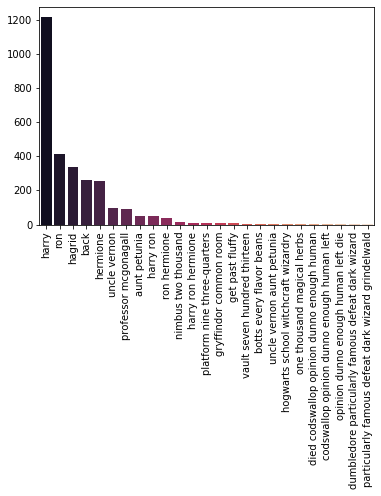

In [36]:
import seaborn as sns

gramplot = sns.barplot(list(dictofgrams.keys()), list(dictofgrams.values()),palette="rocket")
for item in gramplot.get_xticklabels():
    item.set_rotation(90)

The visualization gives pretty much the most important characters in the text (harry, ron, hermione, hagrid, uncle vernon, aunt petunia, professor mcgonagall etc) and as well explains the main parts of story such as (the vault seven hundred and thirteen and getting past fluffy, platform 9 3/4, nimbus 2000 being the first broom of harry, hogwarts school and dumbledore defeating wizard grindelwald etc). 